# 95-791 Data Mining (Fall 2021) - Final Project, Part 1
### Name: Jamie Lim, Thomas Tam, Tina Feng

# Objective

Recidivism, defined as an arrest for a new felony or misdemeanor crime within three years of the supervision start date, is an important measurement of supervision activities during the entire time people were under supervision or until the date of recidivism for those arrested. 

We are interested in discovering patterns behind recidivism and therefore predicting recidivism using data mining techniques and governmental datasets. 

Ideally, with well-understood relationships between recidivism and predictors, we can hopefully help reduce violent crime, and protect police and other public safety personnel by reducing recidivism. 



## Description of Data

● Number of Observations: 25,835

● Number of Possible Target Variables (Y): 4 , all categorical variables
Recidivism is measured as an arrest for a new felony or misdemeanor crime within three
years of the supervision start date. The test dataset does not include the four dependent
variables.
Recidivism Within 3 years: Binary (0 = No, 1 = Yes)
Recidivism_Arrest_Year1: Binary (0 = No, 1 = Yes)
Recidivism_Arrest_Year2: Binary (0 = No, 1 = Yes)
Recidivism_Arrest_Year3: Binary (0 = No, 1 = Yes)

● Number of Features (Xs): 48

● Number of numerical features: 8 (no. 7 and no. 42-48 in the codebook)

● Number of categorical features: 40

● There are 6 subgroups of features:
1. Supervision Case Information
2. Prison Case Information
3. Prior Georgia Criminal History
4. Prior Georgia Community Supervision History
5. Georgia Board of Pardons and Paroles Conditions of Supervision
6. Supervision Activities|

● Dataset Source:
https://data.ojp.usdoj.gov/stories/s/daxx-hznc

# Data Cleaning and Question Definition 
[Click here to download dataset (we only used the full dataset)](https://data.ojp.usdoj.gov/stories/s/daxx-hznc)

In [1]:
# import needed libaries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from dtreeviz.trees import dtreeviz
import graphviz
# for clean plotting we import warnings to ignore runtime warnings 
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# need np.version.version '1.19.5' or above to work
np.version.version

'1.19.5'

## 1. Data Cleaning

In [3]:
# read in csv
df = pd.read_csv('NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [4]:
# take an initial look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [5]:
# look at distribution for numerical variables
df.describe()

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Training_Sample
count,25835.000000,25835.000000,25360.000000,19732.000000,20663.000000,20663.000000,20663.000000,20663.00000,25373.000000,25027.000000,25835.000000
mean,13314.004838,12.361796,6.082216,93.890044,0.063350,0.013741,0.012890,0.00755,0.482331,0.769295,0.697813
std,7722.206327,7.133742,2.381442,117.169847,0.138453,0.061233,0.060581,0.04115,0.425004,0.813787,0.459215
min,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6626.500000,6.000000,4.000000,28.837366,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,13270.000000,12.000000,6.000000,55.424812,0.000000,0.000000,0.000000,0.00000,0.475728,0.635217,1.000000
75%,20021.500000,18.000000,8.000000,110.333333,0.071429,0.000000,0.000000,0.00000,0.969325,1.000000,1.000000
max,26761.000000,25.000000,10.000000,1088.500000,1.000000,1.000000,1.000000,1.00000,1.000000,8.000000,1.000000


### 1a) Explore if your dataset/s has NAs and deal with them (or provide an explanation for keeping them and how you will deal with them moving forward)

In [6]:
# check for null values
df.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Supervision_Level_First                              1720
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       3277
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

#### Assumptions & Treatments for Features (including those with null) 

Features not needed:
- `ID`: similar to index
- `Residence_PUMA`: out-of-scope geographical feature (could be useful for future analysis)
- `Avg_Days_per_DrugTest`: does not provide insights in recidivists' drug usage
- Training_Sample: not related


Fill Na:
- `Gang_Affiliated`: 
    - Assumption: We assume observations with null value are not gang-affiliated
    - Treatment: fillna with 0
- `Prison_Offense`:
    - Assumption:  This feature cannot be null (since all prisoners in prison has an offense), so we categorize null value as Other
    - Treatment: fillna with "Other"
- `DrugTests_THC_Positive`, `DrugTests_Cocaine_Positive`, `DrugTests_Meth_Positive`, `DrugTests_Other_Positive`:
    - Assumption: We assume observations with null value were not assigned drug tests, thereby having 0% positive rate in drug test results
    - Treatment:   fillna with 0

For the remaining rows with Na, we just drop them because there is no appropriate approach to impute those values and they only count for around 10% of the whole dataset.

In [7]:
# drop features not needed
df_cleaned = df.drop(columns=['ID', 'Residence_PUMA','Avg_Days_per_DrugTest','Training_Sample'])

In [8]:
# fill na
df_cleaned.fillna(value={"Gang_Affiliated": False, "DrugTests_THC_Positive": 0, "DrugTests_Cocaine_Positive": 0,
                 "DrugTests_Meth_Positive": 0, 'DrugTests_Other_Positive':0,
                  "Prison_Offense": 'Other'}, inplace=True)

In [9]:
# number of rows with null value
sum(df_cleaned.isna().any(axis=1))

2674

In [10]:
# drop remaining rows with null value
df_cleaned.dropna(inplace=True)

# take a look at dataframe after cleaning
df_cleaned

,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,...,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,M,BLACK,43-47,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,...,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,M,BLACK,33-37,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,...,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,M,BLACK,48 or older,False,7.0,High,At least some college,3 or more,Drug,1-2 years,...,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,M,WHITE,38-42,False,7.0,High,Less than HS diploma,1,Property,1-2 years,...,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,M,WHITE,33-37,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,...,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,M,BLACK,23-27,False,5.0,Standard,At least some college,1,Other,More than 3 years,...,0.0,0.000000,0.0,0.189507,0.572044,False,True,True,False,False
25831,M,WHITE,38-42,False,5.0,Standard,At least some college,3 or more,Other,More than 3 years,...,0.0,0.000000,0.0,0.757098,0.576104,False,True,False,True,False
25832,M,BLACK,33-37,False,5.0,Standard,At least some college,3 or more,Other,More than 3 years,...,0.0,0.000000,0.0,0.711138,0.894125,False,True,False,True,False
25833,F,WHITE,33-37,False,5.0,Standard,At least some college,3 or more,Other,More than 3 years,...,0.0,0.000000,0.0,0.000000,0.000000,True,False,False,False,False


In [11]:
# make a copy of the dataframe for visualization purpose
df_cleaned_viz = df_cleaned.copy()

### 1b) If you are doing a classifier take note of how many data points per class you have.
- We have four target variables in total: `Recidivism_Within_3years`, `Recidivism_Arrest_Year1`, `Recidivism_Arrest_Year2`, `Recidivism_Arrest_Year3`. But for each model, only one of them will be used.
- Each target variable has boolean values of True/False.



In [12]:
print(f"Recidivism within 3 years: \nTrue - {len(df_cleaned[df_cleaned['Recidivism_Within_3years']==True])}\nFalse - {len(df_cleaned[df_cleaned['Recidivism_Within_3years']==False])}")
print('\n')
print(f"Recidivism Arrest Occurred in Year 1: \nTrue - {len(df_cleaned[df_cleaned['Recidivism_Arrest_Year1']==True])}\nFalse - {len(df_cleaned[df_cleaned['Recidivism_Arrest_Year1']==False])}")
print('\n')
print(f"Recidivism Arrest Occurred in Year 2: \nTrue - {len(df_cleaned[df_cleaned['Recidivism_Arrest_Year2']==True])}\nFalse - {len(df_cleaned[df_cleaned['Recidivism_Arrest_Year2']==False])}")
print('\n')
print(f"Recidivism Arrest Occurred in Year 3: \nTrue - {len(df_cleaned[df_cleaned['Recidivism_Arrest_Year3']==True])}\nFalse - {len(df_cleaned[df_cleaned['Recidivism_Arrest_Year3']==False])}")

Recidivism within 3 years: 
True - 13722
False - 9439


Recidivism Arrest Occurred in Year 1: 
True - 7086
False - 16075


Recidivism Arrest Occurred in Year 2: 
True - 4212
False - 18949


Recidivism Arrest Occurred in Year 3: 
True - 2424
False - 20737


### 1c) Any other necessary conversation such as dealing with categorical variables, verifying each variable is the right type.

In our dataset, there are mostly categorical variables and we acknowledge that there are different methods to encode them, and some encoding method works better for some models. Hence, here in this submission we first explore ordinal encoding:

1. We apply get_dummies to do one-hot encoding for the following non-ordial categorical features:
    - `Supervision_Level_First`
    - `Prison_Offense`
    
2. We apply OrdinalEncoder, *with specific orders* for the following ordinal categorical features:

    - `Education_Level`
    - `Prison_Years`

3. We then apply OrdinalEncoder for the remaining categorical features, *without explicitly specifying orders*

4. Continuous features including `DrugTests_THC_Positive`,`DrugTests_Cocaine_Positive`, `DrugTests_Meth_Positive`, `DrugTests_Other_Positive`, `Percent_Days_Employed`, and `Jobs_Per_Year` will remain the same


*Since the scales for different features do not very a lot (0-10 compared to 0-1), we decide not to normalize our features (in fact, we also did a preliminary test with normalized features, and the result was the same with unnormalized one, which again justified our decision not to conduct normalization).*



In [13]:
# do one-hot encoding for non-ordinal categorical features
df_cleaned = pd.get_dummies(data=df_cleaned,columns=['Supervision_Level_First','Prison_Offense'])
df_cleaned.drop(columns=['Supervision_Level_First_Specialized', 'Prison_Offense_Other'],inplace=True)

In [14]:
# define orders for selected features
edu_cat = ['Less than HS diploma','High School Diploma','At least some college']
prison_yr_cat = ['Less than 1 year','1-2 years','Greater than 2 to 3 years','More than 3 years']

# construct encoder with categories and orders specified
enc = OrdinalEncoder(categories = [edu_cat,prison_yr_cat])


In [15]:
# keep a copy for continuous features
cont_features = ['DrugTests_THC_Positive','DrugTests_Cocaine_Positive', 
                 'DrugTests_Meth_Positive', 'DrugTests_Other_Positive', 
                 'Percent_Days_Employed', 'Jobs_Per_Year']
df_cleaned_cont = df_cleaned[cont_features]

In [16]:
# encode the ordinal categorical features
df_cleaned[['Education_Level','Prison_Years']] = enc.fit_transform(df_cleaned[['Education_Level','Prison_Years']])
df_cleaned[df_cleaned.columns] = OrdinalEncoder().fit_transform(df_cleaned)

# keep the continuous features intact
df_cleaned[cont_features] = df_cleaned_cont

In [17]:
# take a look at the cleaned dataset
pd.set_option('display.max_columns', None)
df_cleaned

,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Supervision_Level_First_High,Supervision_Level_First_Standard,Prison_Offense_Drug,Prison_Offense_Property,Prison_Offense_Violent/Non-Sex,Prison_Offense_Violent/Sex
0,1.0,0.0,5.0,0.0,2.0,2.0,3.0,3.0,7.0,6.0,1.0,3.0,3.0,4.0,0.0,0.0,3.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.000000,0.0,0.000000,0.0,0.488562,0.447610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,3.0,0.0,5.0,0.0,1.0,3.0,8.0,6.0,3.0,0.0,3.0,5.0,1.0,0.0,3.0,4.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,0.000000,0.0,0.000000,0.0,0.425234,2.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,6.0,0.0,6.0,2.0,3.0,1.0,7.0,6.0,3.0,2.0,2.0,5.0,1.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,7.0,0.0,0.0,0.333333,0.0,0.166667,0.0,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,4.0,0.0,6.0,0.0,1.0,1.0,9.0,6.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0,4.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,3.0,0.000000,0.0,0.000000,0.0,1.000000,0.718996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,3.0,0.0,3.0,0.0,3.0,1.0,5.0,4.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.000000,0.0,0.058824,0.0,0.203562,0.929389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,1.0,0.0,1.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.189507,0.572044,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25831,1.0,1.0,4.0,0.0,4.0,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.757098,0.576104,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25832,1.0,0.0,3.0,0.0,4.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.711138,0.894125,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25833,0.0,1.0,3.0,0.0,4.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
bool_series = df_cleaned_viz.dtypes == bool

In [19]:
df_cleaned_viz[list(bool_series[bool_series == True].index)]=df_cleaned_viz[list(bool_series[bool_series == True].index)].astype('int64')

In [20]:
df_cleaned_viz

,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,M,BLACK,43-47,0,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,0,0,3 or more,3,0,2,2 or more,0,0,0,0,0,1,1,0,0,0,0,0,0,6,0,2,0.000000,0.0,0.000000,0.0,0.488562,0.447610,0,0,0,0,0
1,M,BLACK,33-37,0,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,1,0,3 or more,4 or more,1,0,2 or more,1,1,1,0,0,0,0,0,0,1,0,0,4 or more,0,0,2,0.000000,0.0,0.000000,0.0,0.425234,2.000000,0,1,0,0,1
2,M,BLACK,48 or older,0,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,1,0,3 or more,2,1,1,2 or more,0,1,0,0,0,1,1,0,0,1,0,1,4 or more,6,0,0,0.333333,0.0,0.166667,0.0,0.000000,0.000000,0,1,0,1,0
3,M,WHITE,38-42,0,7.0,High,Less than HS diploma,1,Property,1-2 years,8,6 or more,0,3,3,3,0,0,3 or more,4 or more,0,3 or more,2 or more,0,0,0,0,1,1,1,0,0,0,0,0,0,6,0,3 or more,0.000000,0.0,0.000000,0.0,1.000000,0.718996,0,0,0,0,0
4,M,WHITE,33-37,0,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,4,3 or more,2,1,3,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,7,0,0,0.000000,0.0,0.058824,0.0,0.203562,0.929389,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,M,BLACK,23-27,0,5.0,Standard,At least some college,1,Other,More than 3 years,2,2,2,0,0,0,1,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0.000000,0.0,0.000000,0.0,0.189507,0.572044,0,1,1,0,0
25831,M,WHITE,38-42,0,5.0,Standard,At least some college,3 or more,Other,More than 3 years,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10 or more,0,0,0.000000,0.0,0.000000,0.0,0.757098,0.576104,0,1,0,1,0
25832,M,BLACK,33-37,0,5.0,Standard,At least some college,3 or more,Other,More than 3 years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.000000,0.0,0.000000,0.0,0.711138,0.894125,0,1,0,1,0
25833,F,WHITE,33-37,0,5.0,Standard,At least some college,3 or more,Other,More than 3 years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1,0,0,0,0


###  
## 2. Data Visualization

### 2.1 Viaualising all features

<AxesSubplot:>

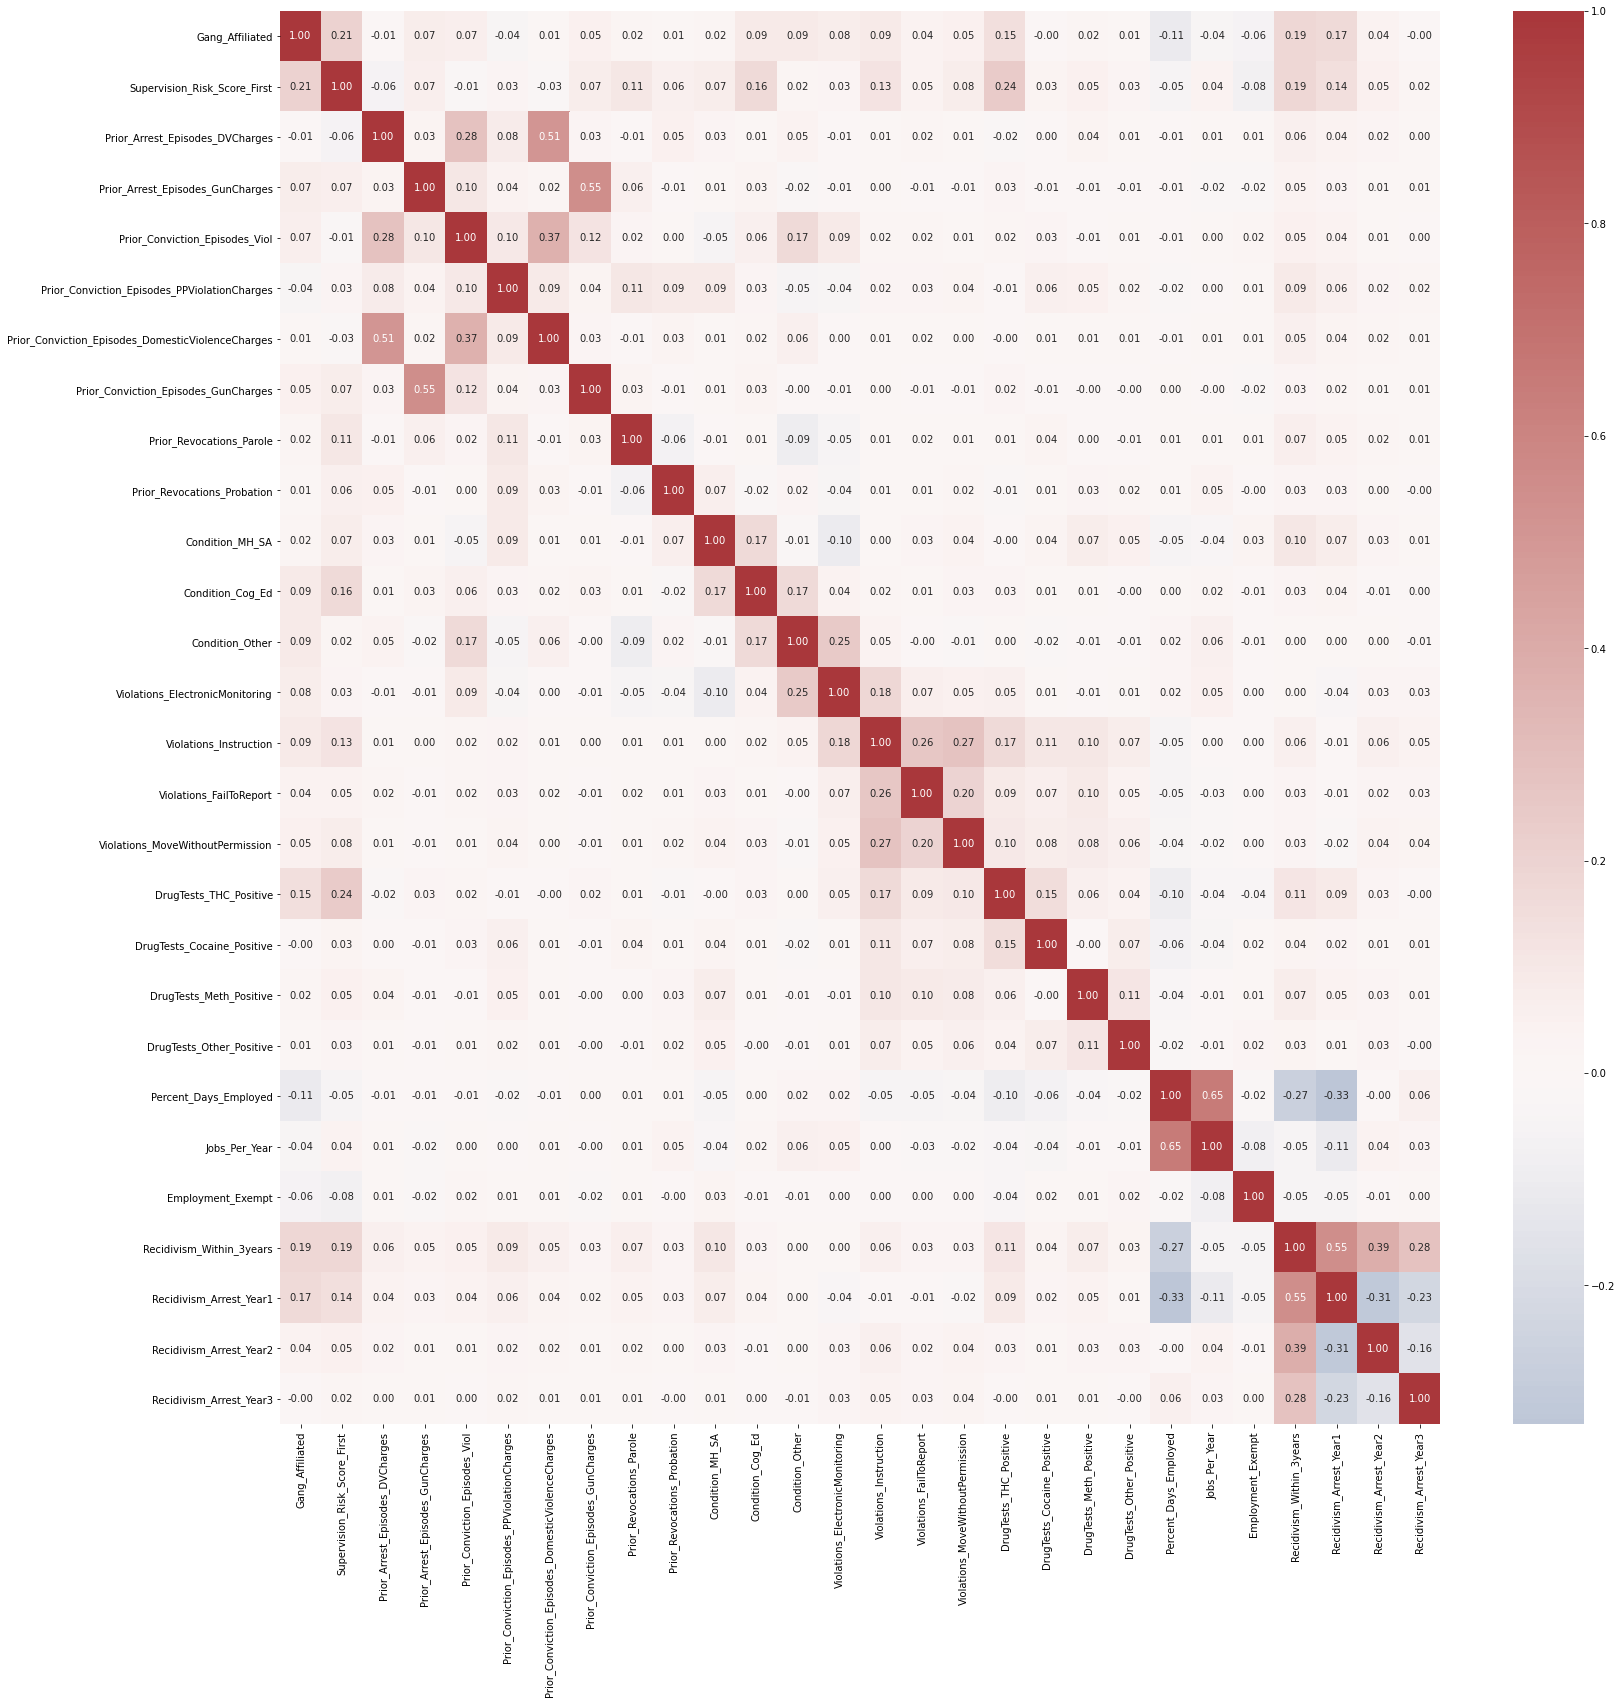

In [21]:
# create a correlation plot with .corr on dataframe

plt.figure(figsize=(26, 26))
# add the argument center = 0, so correlation 0 appears white, -1 appears blue and +1 appears red
sns.heatmap(df_cleaned_viz.corr(), annot=True, cmap="vlag", fmt = '.2f', center=0)

**Comment:**
From the correlation plot, below are some relatively strong correlations:
1. positive correlation (0.51) between `Prior_Arrest_Episodes_DVCharges` and `Prior_Conviction_Episodes_DomesticViolenceCharges`
2. positive correlation (0.55) between `Prior_Arrest_Episodes_GunCharges` and `Prior_Conviction_Episodes_GunCharges`
3. positive correlation (0.65) between `Percent_Days_Employed` and `Jobs_Per_Year`
3. negative correlation (-0.27) between `Percent_Days_Employed` and `Recidivism_Within_3years`



### 2.2 Visualising a selection of features from 6 sub-groups

#### 2.2.1 Supervision Case Information

([<matplotlib.axis.XTick at 0x1aa080d52b0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

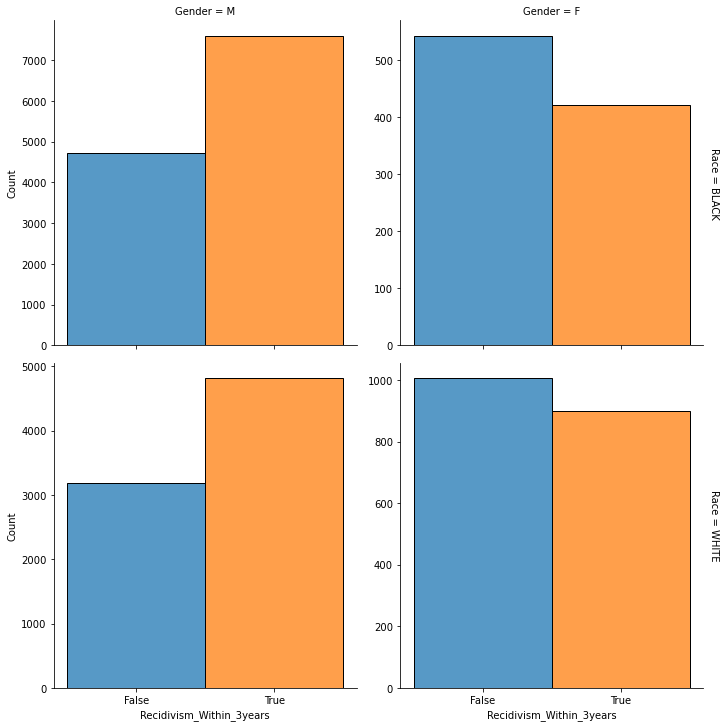

In [22]:
# Plotting Gender on columns and Race on rows and hue showing Recidivised_Within_3years = True / False

g = sns.FacetGrid(df_cleaned_viz, col="Gender",  row="Race", margin_titles=True, hue = "Recidivism_Within_3years", height=5,sharey = False)
g.map_dataframe(sns.histplot, x="Recidivism_Within_3years")
g.axes[0,0].set_ylabel('Count')
g.axes[1,0].set_ylabel('Count')
g.axes[1,0].set_xlabel('Recidivism_Within_3years')
g.axes[1,1].set_xlabel('Recidivism_Within_3years')
plt.xticks([0, 1], ['False', 'True'])

**Comment**

From the plot above, we can see that the percentage of recidivised is higher for male than female, while female are less likely to be recidivised.

<AxesSubplot:xlabel='Recidivism_Within_3years', ylabel='Supervision_Risk_Score_First'>

<Figure size 1440x1440 with 0 Axes>

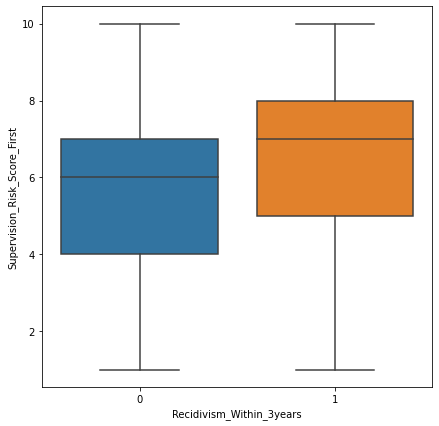

In [23]:
# Plotting the value of first Supervision Risk  Assessment Score vs. Recidivised_Within_3years = True / False
plt.figure(figsize=(20,20))

plt.figure(figsize=(7, 7))
sns.boxplot(y="Supervision_Risk_Score_First", x="Recidivism_Within_3years", data=df_cleaned_viz)
# plt.savefig('risk score')


**Comment:**

From the plot above, people who recidivised on average have higher first supervision risk assessment score.

Text(3.6750000000000043, 0.5, 'Count')

<Figure size 1440x1440 with 0 Axes>

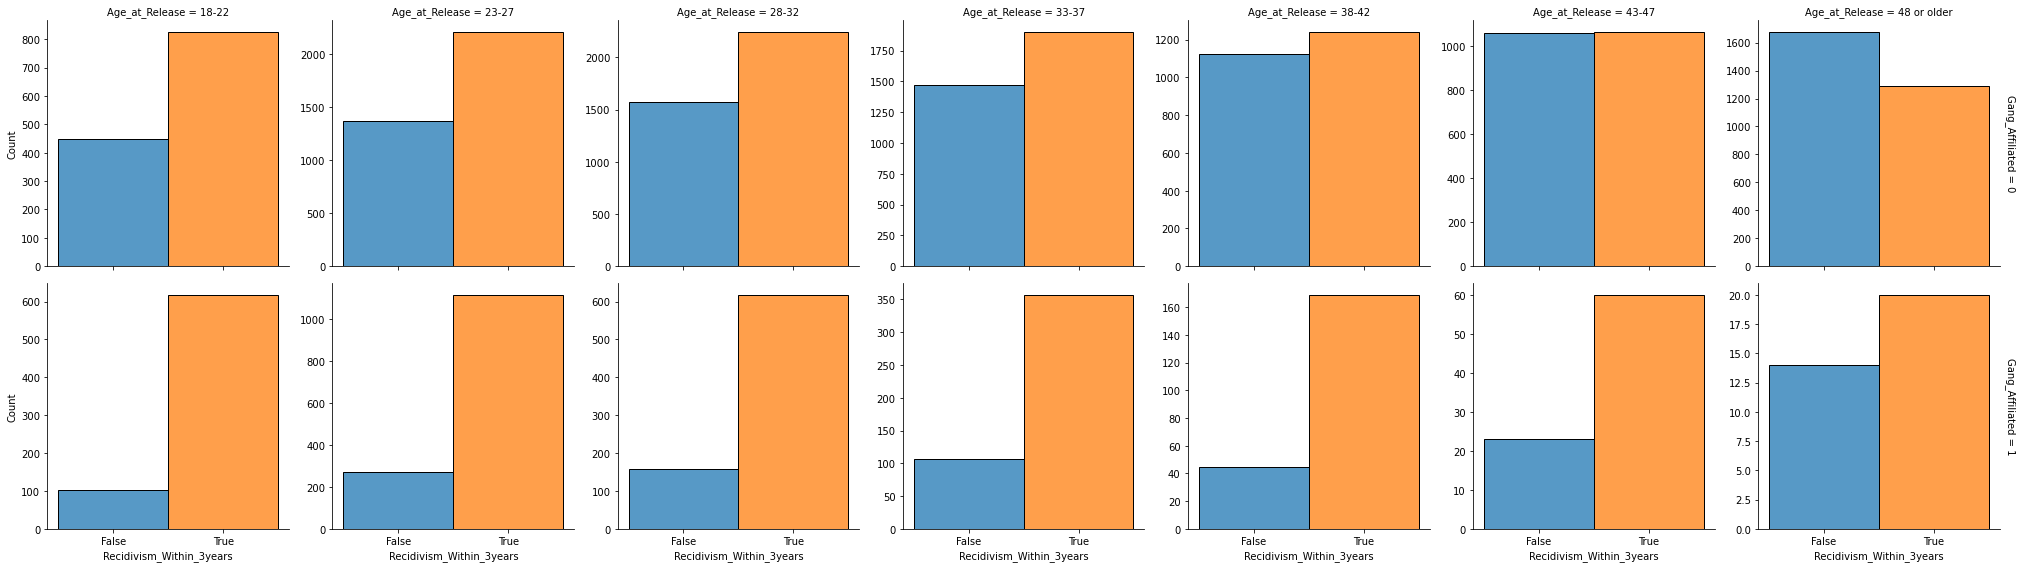

In [24]:
# Plotting Age_at_Release on columns and Gang_affiliated on rows and hue showing Recidivised_Within_3years = True / False
plt.figure(figsize=(20,20))
plt.tight_layout(pad=2.0)

col_order = [ '18-22', '23-27', '28-32', '33-37', '38-42','43-47','48 or older']

g = sns.FacetGrid(df_cleaned_viz, col="Age_at_Release",col_order=col_order,  row="Gang_Affiliated", height = 4, margin_titles=True, hue = "Recidivism_Within_3years", sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")
plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')
g.axes[1,0].set_ylabel('Count')


# g.savefig('Age vs. Gang')

**Comment:**

From the plot, we can see that younger people (left side of the plot) are more likely to recidivised.

Gang affiliated people are more associated with recidivisim.

#### 2.2.2 Prison Case Information

Text(3.6750000000000043, 0.5, 'Count')

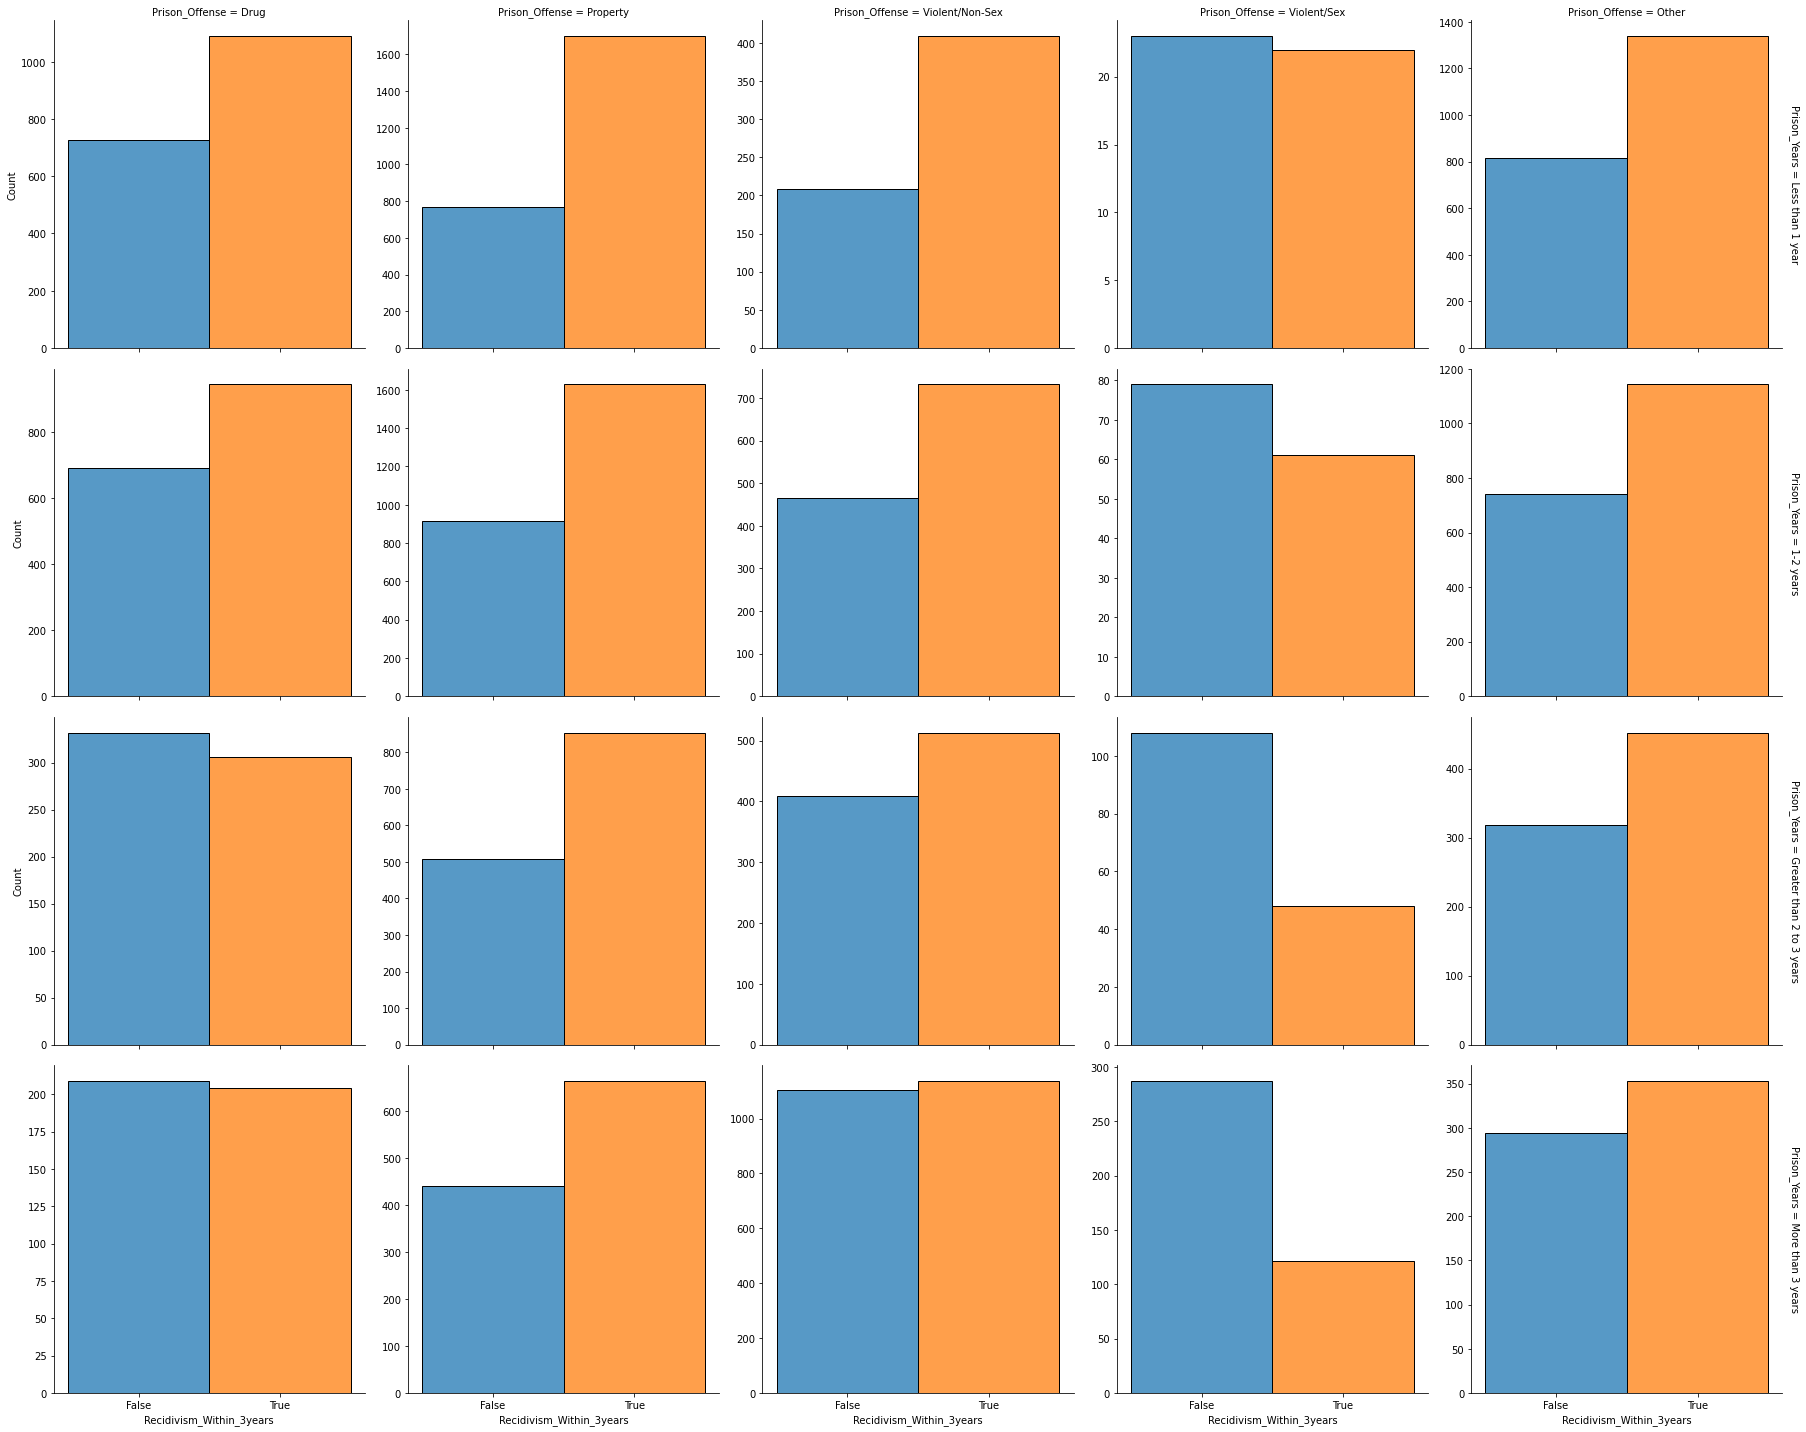

In [25]:
# Prison_Offense and Prison_Years to Recidivism_Within_3years
prison_offense_cat = ['Drug','Property','Violent/Non-Sex','Violent/Sex','Other']
g = sns.FacetGrid(df_cleaned_viz, col="Prison_Offense", col_order = prison_offense_cat,  row = "Prison_Years", row_order = prison_yr_cat, margin_titles=True,hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")
plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')
g.axes[1,0].set_ylabel('Count')
g.axes[2,0].set_ylabel('Count')

**Comment:**

From the plot, it appears that people who had property-related offense (column 2 in the plot) are more associated with recidivism, comparing to other offenses.

And it appears the longer the prison years (further down the rows), the less assocated it is with recidivism.

#### 2.2.3 Prior Georgia Criminal History

Text(-2.700000000000003, 0.5, 'Count')

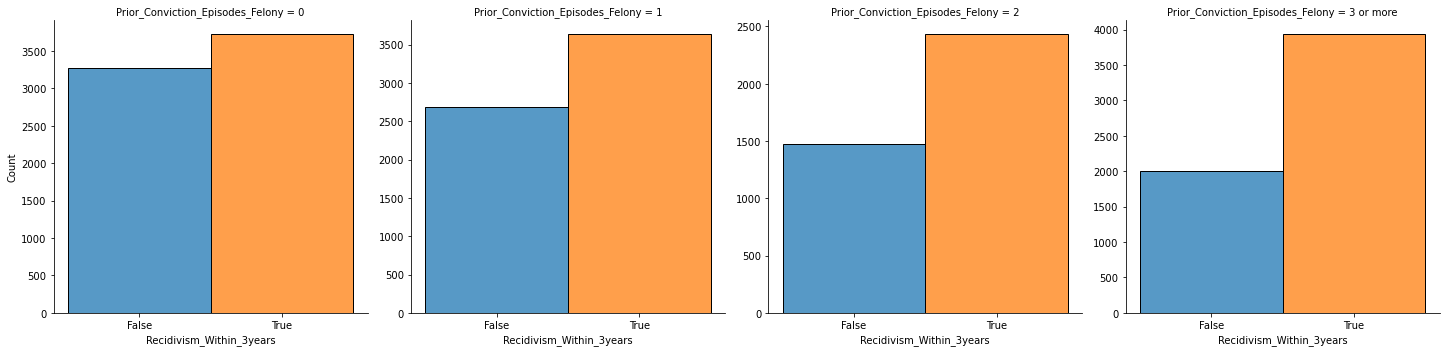

In [26]:
# Felony
col_order = ['0','1','2','3 or more'] 
g = sns.FacetGrid(df_cleaned_viz, col="Prior_Conviction_Episodes_Felony", col_order=col_order, hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')

**Comment:**

From the plot, we can see that people with 3 or more episodes of prior felony conviction are more associated with recidivism 

Text(-2.6999999999999957, 0.5, 'Count')

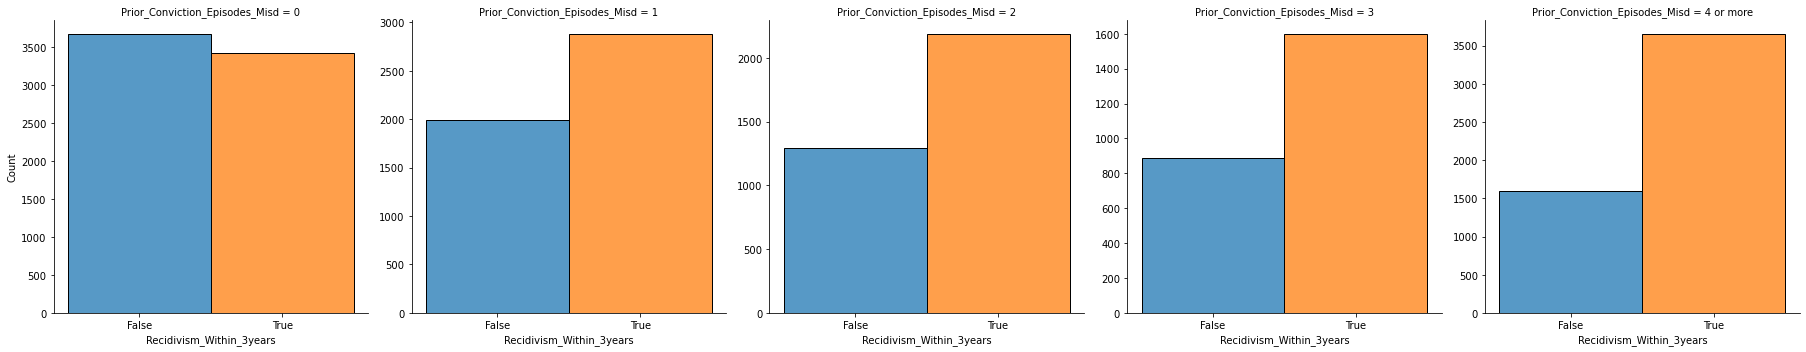

In [27]:
# Misdemeanor 
col_order = ['0', '1', '2', '3', '4 or more']
g = sns.FacetGrid(df_cleaned_viz, col="Prior_Conviction_Episodes_Misd", col_order = col_order,hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')

**Comment:**

From the plot, we can see that people with 4 or more episodes of prior misdemeanor conviction are more associated with recidivism. 

Text(-2.700000000000003, 0.5, 'Count')

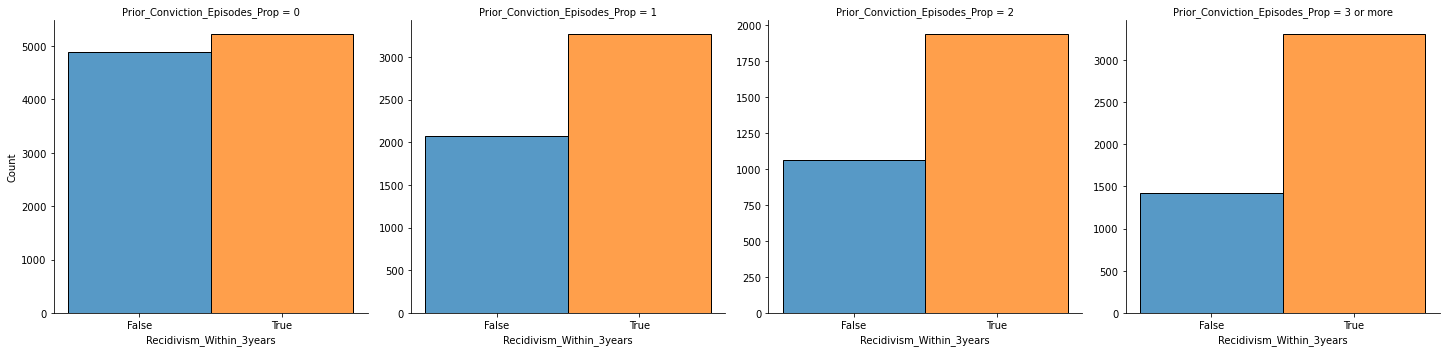

In [28]:
# Property
col_order = ['0', '1', '2', '3 or more']
g = sns.FacetGrid(df_cleaned_viz, col="Prior_Conviction_Episodes_Prop", col_order = col_order, hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')

**Comment:**

From the plot, we can see that people with 3 or more episodes of prior property conviction are more associated with recidivism. 

Text(-2.700000000000003, 0.5, 'Count')

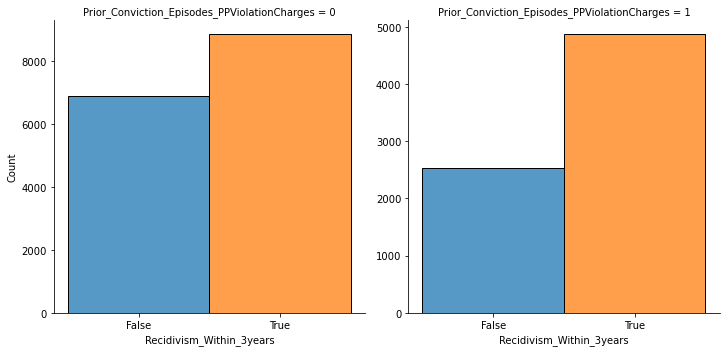

In [29]:
# Probation/Parole Violation Charges

g = sns.FacetGrid(df_cleaned_viz, col="Prior_Conviction_Episodes_PPViolationCharges", hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')


**Comment:**

From the plot, we can see that people with prior Probation/Parole Violation conviction are slightly more associated with recidivism.

Text(-9.075000000000003, 0.5, 'Count')

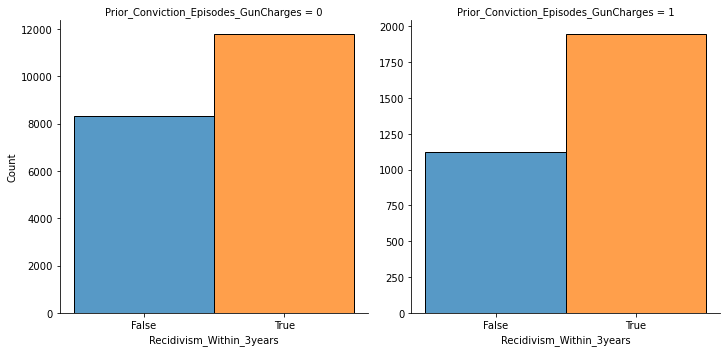

In [30]:
# Gun Charges
g = sns.FacetGrid(df_cleaned_viz, col="Prior_Conviction_Episodes_GunCharges", hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')


**Comment:**

From the plot, to our surprise, we can see that people with prior gun charges conviction are not very different from those without gun charges when it comes to recidivism.

Text(-9.075000000000003, 0.5, 'Count')

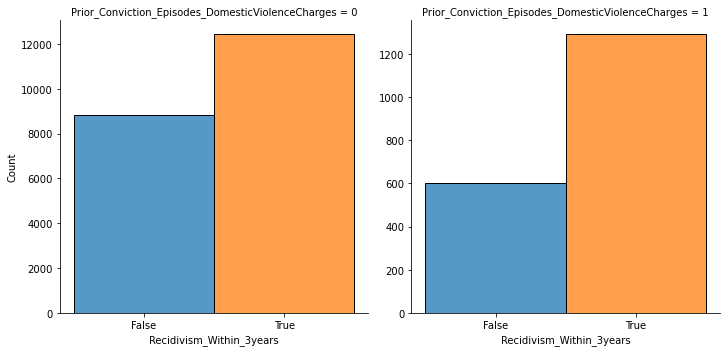

In [31]:
# Domestic Violence Charges
g = sns.FacetGrid(df_cleaned_viz, col="Prior_Conviction_Episodes_DomesticViolenceCharges", hue = "Recidivism_Within_3years", height = 5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')


**Comment:**

From the plot, we can see that people with prior domestic violence charges conviction are more associated with recidivism.

#### 2.2.4 Prior Georgia Cimmunity Supervision History

Text(-2.700000000000003, 0.5, 'Count')

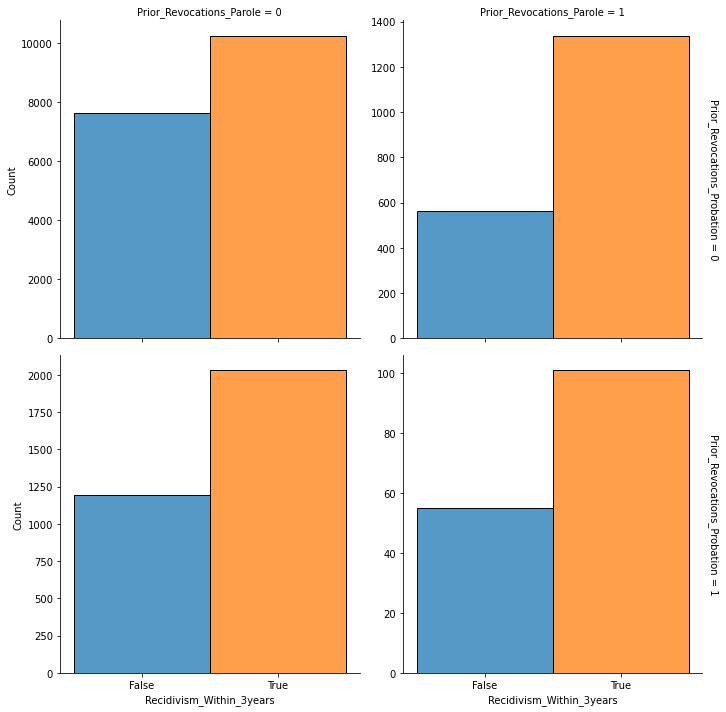

In [32]:
# Prior_Revocations_Parole and Prior_Revocations_Probation

g = sns.FacetGrid(df_cleaned_viz, col='Prior_Revocations_Parole',  row='Prior_Revocations_Probation', margin_titles=True,hue = 'Recidivism_Within_3years', height=5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')
g.axes[1,0].set_ylabel('Count')


**Comment:**

If the person had prior Parole Revocation but did not have Probation Revocation, the person is more associated with recidivism.

#### 2.2.5. Georgia Board of Pardons and Paroles Conditions of Supervision

Text(-2.700000000000003, 0.5, 'Count')

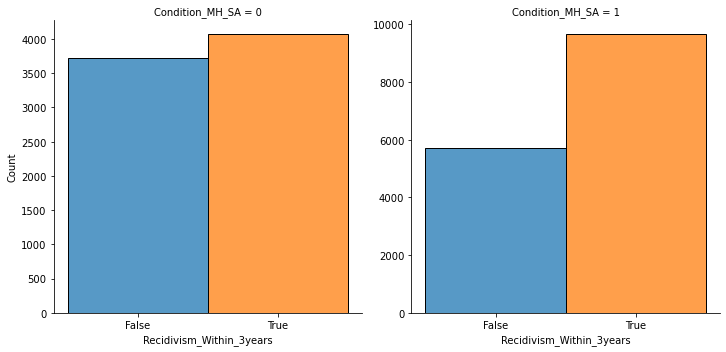

In [33]:
# Mental Health/ Substance Abuse Programming 
g = sns.FacetGrid(df_cleaned_viz, col='Condition_MH_SA', hue = 'Recidivism_Within_3years', height=5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')

**Comment:**
    
It appears that people who recidivised are more likely for people who had Mental Health/ Substance Abuse Programming as Parole Release Condtion.

Text(-2.700000000000003, 0.5, 'Count')

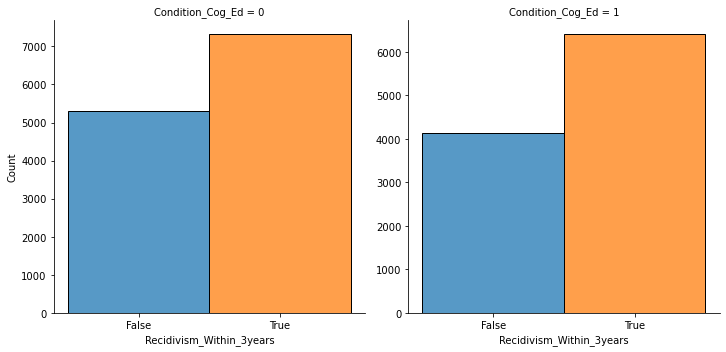

In [34]:
# cognitive skils / education programming
g = sns.FacetGrid(df_cleaned_viz, col='Condition_Cog_Ed', hue = 'Recidivism_Within_3years', height=5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')

**Comment:**
    
It appears that recidivism is similar whether the person is on Cognitive Skils / Education programming as parole release condition or not.

Text(-2.700000000000003, 0.5, 'Count')

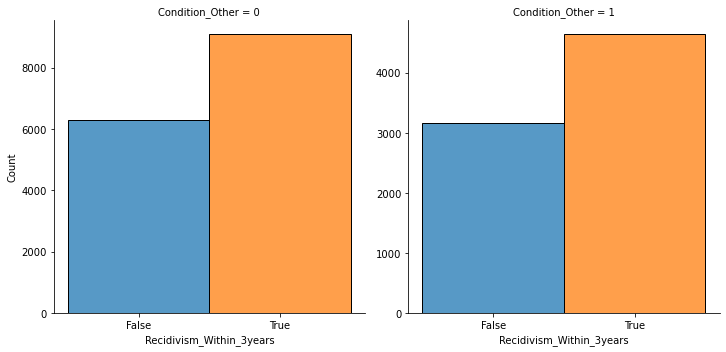

In [35]:
# Other Condition
g = sns.FacetGrid(df_cleaned_viz, col='Condition_Other', hue = 'Recidivism_Within_3years', height=5, sharey = False)
g.map_dataframe(sns.histplot, "Recidivism_Within_3years")

plt.xticks([0, 1], ['False', 'True'])
g.axes[0,0].set_ylabel('Count')

**Comment:**

    
It appears that recidivism is similar whether the person is on other programming (such as No Victim Contact/ Electronic Monitoring, etc) as parole release condition or not.

#### 2.2.6. Supervision Activities

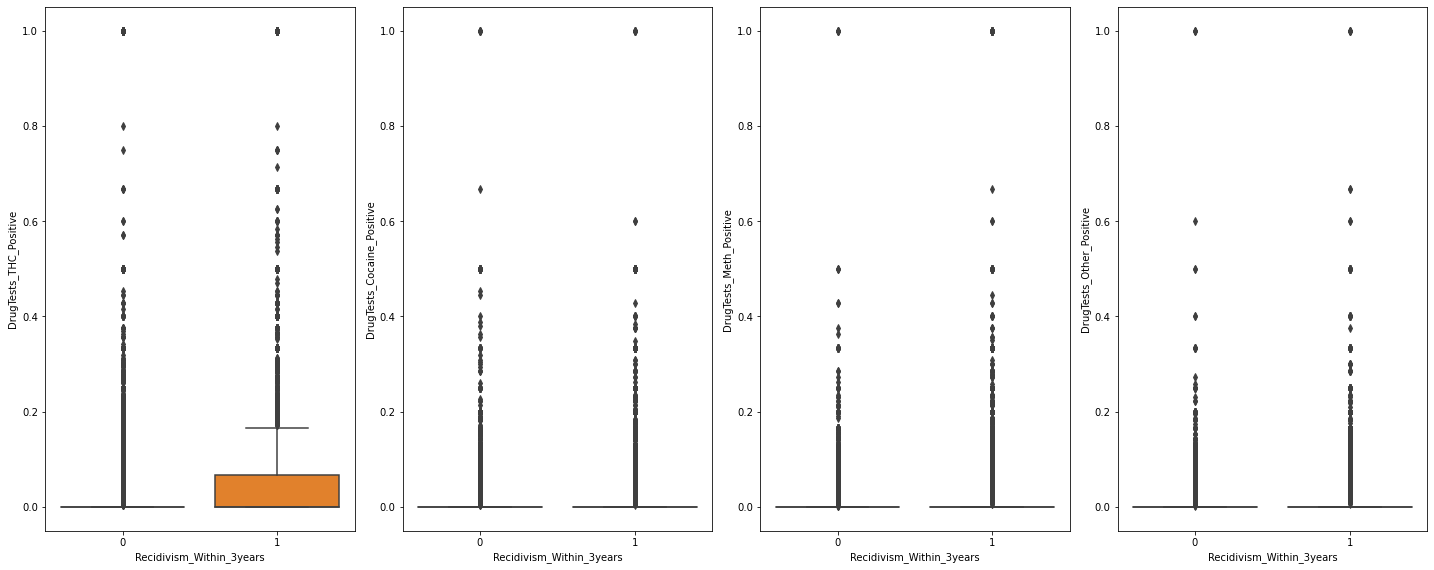

In [36]:
# Drug Tests 

fig, axes = plt.subplots(1,4, figsize= (20,8))
sns.boxplot(y="DrugTests_THC_Positive", x="Recidivism_Within_3years", data=df_cleaned_viz, ax=axes[0])
sns.boxplot(y="DrugTests_Cocaine_Positive", x="Recidivism_Within_3years", data=df_cleaned_viz, ax=axes[1])
sns.boxplot(y="DrugTests_Meth_Positive", x="Recidivism_Within_3years", data=df_cleaned_viz, ax=axes[2])
sns.boxplot(y="DrugTests_Other_Positive", x="Recidivism_Within_3years", data=df_cleaned_viz, ax=axes[3])
fig.tight_layout(pad=1.0)


**Comment:**

From the plot it appears that people who did recidivise has a higher percentage of THC/Marijuana positive drug test.

<AxesSubplot:xlabel='Recidivism_Within_3years', ylabel='Percent_Days_Employed'>

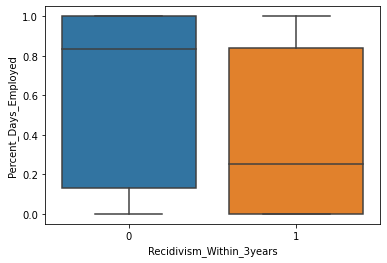

In [37]:
# Percentage days employed 

sns.boxplot(y="Percent_Days_Employed", x="Recidivism_Within_3years", data=df_cleaned_viz)

**Comment:**

From the plot it appears that people who did not recidivise has a higher average percentage of days employed than recidivised people.

<AxesSubplot:xlabel='Recidivism_Within_3years', ylabel='Jobs_Per_Year'>

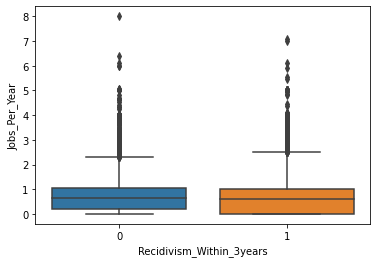

In [38]:
# Jobs per year
sns.boxplot(y="Jobs_Per_Year", x="Recidivism_Within_3years", data=df_cleaned_viz)

**Comment:**

From the plot it appears that people who did not recidivise has slightly more jobs per year, but the difference is not apparent from the plot.

## 3. Three questions we want to answer with our dataset

1. Given an individual's criminal record, is he/she likely to recidivate* and what are the main features associated with recidivism?? - *Binary Classification*

2. If an individual is classified as a potential recidivist, in which year* is he/she likely to recidivate and what features are associated with the difference in arrest years? - *Multiclass Classification* 

3. What are the shared characteristics of subgroups of recidivists? -*Clustering* 


## 4. Preliminary Test

In [39]:
# split into X and y variables
X = df_cleaned.drop(columns=['Recidivism_Within_3years','Recidivism_Arrest_Year1',
                                                     'Recidivism_Arrest_Year2','Recidivism_Arrest_Year3'])
y = df_cleaned['Recidivism_Within_3years']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# fit a basic tree classifier model
# for this preliminary test, we pick max_depth = 5
tree = DecisionTreeClassifier(max_depth=5,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [41]:
# see how well the model performs
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      0.51      0.59      1941
         1.0       0.71      0.84      0.77      2692

    accuracy                           0.71      4633
   macro avg       0.70      0.68      0.68      4633
weighted avg       0.71      0.71      0.70      4633



Overall, the model has an accuracy of 0.71, which is not bad.
- It performs better in classifiying subjects recidivised within 3 years (both precision and recall are high)
- It performs a bit worse in classifiying the opposite class (not recidivised within 3 years) since the recall is only 0.51.

#### Tree Plot

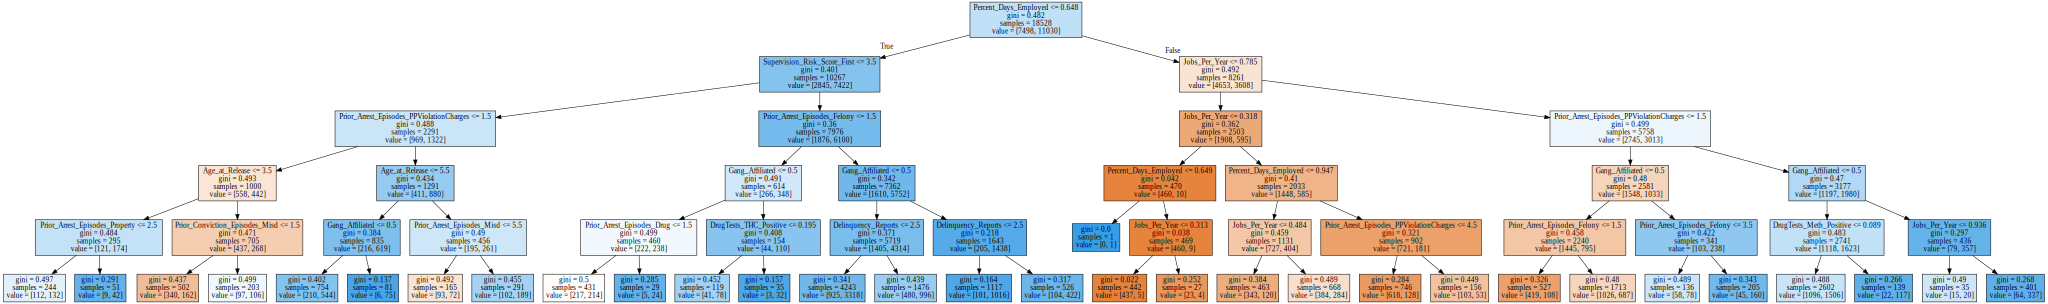

In [42]:
# plot the tree model
tree_data = export_graphviz(tree, out_file=None, 
                                feature_names=list(X.columns),  
                                filled=True)

#export it to png image
graph = graphviz.Source(tree_data, format="png") 
graph

#### Plot Feature Importance

In [43]:
# get feature importance from previous model
tree_importances = pd.DataFrame({ 'features': X.columns, 'importances': tree.feature_importances_ })

Text(0.5, 0, 'Features')

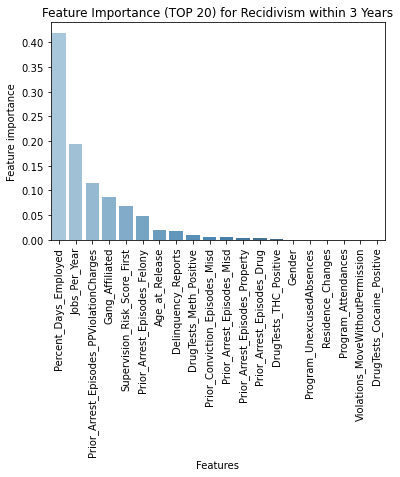

In [44]:
# plot feature importance
sns.barplot(x="features",y="importances" ,data=tree_importances, 
            order=tree_importances.sort_values('importances',ascending = False)[:20].features, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Feature Importance (TOP 20) for Recidivism within 3 Years")
plt.ylabel("Feature importance")
plt.xlabel("Features")


In [45]:
# export cleaned dataframe to csv
df_cleaned.to_csv('df_cleaned.csv',index=False)

### 
# References
- Lab 3
- Homework 2
- Homework 3
- [Parole supervision](https://dcs.georgia.gov/offender-supervision-0/parole-supervision)
- [Community supervision](https://charleskochinstitute.org/stories/what-is-community-supervision/)
- [sklearn OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
- [Hide Python Runtime Warnings](https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython)
- [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
